# Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Read Data and Perform Data Profiling

In [2]:
# Read data
df = pd.read_csv('car_prices.csv', error_bad_lines=False)

/Users/pkhatri/opt/anaconda3/envs/myenv3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw 17\nSkipping line 461614: expected 16 fields, saw 17\n'
b'Skipping line 492486: expected 16 fields, saw 17\nSkipping line 497010: expected 16 fields, saw 17\nSkipping line 497013: expected 16 fields, saw 17\nSkipping line 49908

In [3]:
# Set display columns number to 100
pd.set_option('display.max_columns', 100)

In [4]:
# Check First 5 lines of data
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [5]:
# Total number of rows and columns
print('Rows:', df.shape[0])
print('Columns:', df.shape[1])

Rows: 558811
Columns: 16


In [6]:
# Get column names and save it as cols
cols = list(df.columns)
print('Columns are:\n', cols)

Columns are:
 ['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr', 'sellingprice', 'saledate']


In [7]:
# Information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [8]:
# Summary of dataset for numerical variables
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [9]:
# Total unique values
df.nunique()

year                34
make                96
model              973
trim              1975
body                86
transmission         2
vin             550296
state               38
condition           41
odometer        172277
color               20
interior            17
seller           14264
mmr               1101
sellingprice      1887
saledate          3745
dtype: int64

# Data Cleaning

## Checking for Null values

In [10]:
df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [11]:
# Now Removing all the rows where Year, Manufacturer or model are null
for i in ['make', 'model']:
    df.dropna(subset=[i], inplace=True)

In [12]:
# Replacing null values for trim and transmission with "Unknown"
df.loc[:, ['trim', 'transmission']].fillna('Unknown', inplace=True)

In [13]:
# Replace null values of categorical columns with most frequently occuring one and numerical columns with median values
for col in df.columns:
    if df[col].dtypes == 'O':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

In [14]:
# Checking for null again
df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

## Checking for Outliers

year                AxesSubplot(0.125,0.71587;0.227941x0.16413)
condition        AxesSubplot(0.398529,0.71587;0.227941x0.16413)
odometer         AxesSubplot(0.672059,0.71587;0.227941x0.16413)
mmr                AxesSubplot(0.125,0.518913;0.227941x0.16413)
sellingprice    AxesSubplot(0.398529,0.518913;0.227941x0.16413)
dtype: object

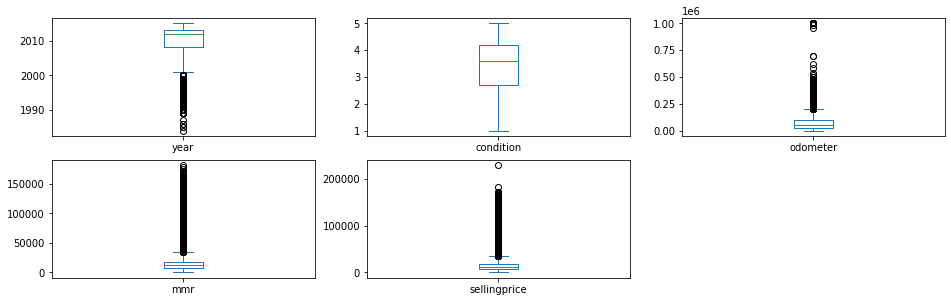

In [15]:
df.plot(kind='box', subplots=True, layout=(4, 3), figsize=(16, 10))

For Year: Most listed cars were after 2000. Some cars were manufactured before 2000 and those are completely valid. No need to make any adjustements.
For Odometer, mmr and sellingprice, further analysis are required before making a decision.

In [16]:
# Checking Outliers of Odometer
df[df['odometer'] > 300000].groupby('year')['odometer'].count()

year
1992     7
1993     8
1994     8
1995     8
1996    16
1997    30
1998    28
1999    38
2000    32
2001    51
2002    62
2003    57
2004    49
2005    55
2006    50
2007    44
2008    44
2009    37
2010    32
2011    10
2012     7
2013     7
2014     4
Name: odometer, dtype: int64

For odometer it seems unlikely that those higher odometer are possible looking at the year made. 
The outliers will be replaced with median value.

In [17]:
df['odometer'].where(df['odometer']<300000, df['odometer'].median(), inplace=True)

In [18]:
# Checking outliers for mmr and selling price
print('High MMR by Make')
print(df[df['mmr']>100000].groupby(['make', 'model'])['mmr'].count())
print()
print('High Selling Price by Make')
print(df[df['sellingprice']>100000].groupby(['make', 'model'])['sellingprice'].count())

High MMR by Make
make           model                        
Audi           R8                                8
               RS 7                              7
BMW            M6                                7
               M6 Gran Coupe                     2
               i8                                9
Bentley        Continental Flying Spur           2
               Continental Flying Spur Speed     2
               Continental GT                   11
               Continental GTC                  10
               Continental GTC Speed             1
               Continental Supersports           1
               Flying Spur                       2
Ferrari        458 Italia                        1
               California                       13
               F430                              3
Lamborghini    Gallardo                          4
Land Rover     Range Rover                      23
Mercedes-Benz  G-Class                          24
               S-Cla

Based on make and model, most higher priced cars were luxury and high class cars. For 2 Ford Escape, the selling price was higher than 100,000.

In [19]:
# Checking 2 Ford Escape
df[(df['sellingprice']>100000) & (df['make']=='Ford')]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
160201,2010,Ford,Escape,XLT,SUV,automatic,1fmcu0d77aka54695,oh,3.7,82985.0,red,gray,pat obrien chevrolet south,8250,108200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
344905,2014,Ford,Escape,Titanium,SUV,automatic,1fmcu9j98eua23833,mo,4.3,27802.0,green,tan,ford-lincoln dealer program,22800,230000,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)


Clearly there was a huge difference between selling price and mmr. Next we will correct selling price where the difference between mmr and selling price are greater than 25%. 

In [20]:
# Replacing probable incorrect selling price with mmr
df['sellingprice'].where((abs(df['sellingprice'] - df['mmr'])/df['mmr']) < 0.25, df['mmr'], inplace=True)

### Categorical variables fix

In [21]:
# Checking for Make name
df['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', 'bmw', 'Dodge', 'FIAT',
       'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC', 'mitsubishi', 'Ram',
       'smart', 'chevrolet', 'Bentley', 'chrysler', 'pontiac', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'landrover', 'cadillac',
       'land rover', 'mercedes', 'mazda', 'toyota', 'lexus', 'gmc truck',
       'honda', 'nissan', 'porsche', 'Saab', 'Suzuki', 'dodge', 'subaru',
       'Oldsmobile', 'oldsmobile', 'hyundai', 'jeep', 'Isuzu', 'dodge tk',
       'Geo', 'acura', 'volkswagen', 'suzuki', 'kia', 'audi',
       'Rolls-Royce', 'gmc', 'maserati', 'mazda tk', 'mercury', 'buick',
       'hyundai tk', 'mercedes-b', 'vw', 'Daewoo', 'chev truck',
       'ford t

For some vehicles although the make are same, some are written in lower case and some in upper case. Also, for some vehicle some suffix is added after their make. We will remove those discrepancies. 

In [22]:
# Capitalize the make
df['make'] = df['make'].str.upper()

# Remove any Suffix
df['make'] = df['make'].apply(lambda x: x.split()[0])

In [23]:
# Checking make again
df['make'].unique()

array(['KIA', 'BMW', 'VOLVO', 'NISSAN', 'CHEVROLET', 'AUDI', 'FORD',
       'HYUNDAI', 'BUICK', 'CADILLAC', 'ACURA', 'LEXUS', 'INFINITI',
       'JEEP', 'MERCEDES-BENZ', 'MITSUBISHI', 'MAZDA', 'MINI', 'LAND',
       'LINCOLN', 'JAGUAR', 'VOLKSWAGEN', 'TOYOTA', 'SUBARU', 'SCION',
       'PORSCHE', 'DODGE', 'FIAT', 'CHRYSLER', 'FERRARI', 'HONDA', 'GMC',
       'RAM', 'SMART', 'BENTLEY', 'PONTIAC', 'SATURN', 'MASERATI',
       'MERCURY', 'HUMMER', 'LANDROVER', 'MERCEDES', 'SAAB', 'SUZUKI',
       'OLDSMOBILE', 'ISUZU', 'GEO', 'ROLLS-ROYCE', 'MERCEDES-B', 'VW',
       'DAEWOO', 'CHEV', 'PLYMOUTH', 'TESLA', 'AIRSTREAM', 'DOT', 'ASTON',
       'FISKER', 'LAMBORGHINI', 'LOTUS'], dtype=object)

In [24]:
# Renaming MERCEDES-BENZ and MERCEDES-B to MERCEDES and VW to VOLKSWAGEN
df['make'] = df['make'].replace({'MERCEDES-B': 'MERCEDES', 
                                'MERCEDES-BENZ': 'MERCEDES', 
                                'VW': 'VOLSKWAGEN'})
# Checking make again
df['make'].unique()

array(['KIA', 'BMW', 'VOLVO', 'NISSAN', 'CHEVROLET', 'AUDI', 'FORD',
       'HYUNDAI', 'BUICK', 'CADILLAC', 'ACURA', 'LEXUS', 'INFINITI',
       'JEEP', 'MERCEDES', 'MITSUBISHI', 'MAZDA', 'MINI', 'LAND',
       'LINCOLN', 'JAGUAR', 'VOLKSWAGEN', 'TOYOTA', 'SUBARU', 'SCION',
       'PORSCHE', 'DODGE', 'FIAT', 'CHRYSLER', 'FERRARI', 'HONDA', 'GMC',
       'RAM', 'SMART', 'BENTLEY', 'PONTIAC', 'SATURN', 'MASERATI',
       'MERCURY', 'HUMMER', 'LANDROVER', 'SAAB', 'SUZUKI', 'OLDSMOBILE',
       'ISUZU', 'GEO', 'ROLLS-ROYCE', 'VOLSKWAGEN', 'DAEWOO', 'CHEV',
       'PLYMOUTH', 'TESLA', 'AIRSTREAM', 'DOT', 'ASTON', 'FISKER',
       'LAMBORGHINI', 'LOTUS'], dtype=object)

In [25]:
# Similarly changing model, trim and body to uppercase as well
for col in ['model', 'trim', 'body', 'state']:
    df[col] = df[col].str.upper()

In [26]:
# Checking for models, trim and body
print('Total Models:', df['model'].nunique())
print('Model names: ', df['model'].unique())
print()

print('Total Trims:', df['trim'].nunique())
print('Trim names: ', df['trim'].unique())
print()

print('Total Body:', df['body'].nunique())
print('Body names: ', df['body'].unique())

Total Models: 851
Model names:  ['SORENTO' '3 SERIES' 'S60' '6 SERIES GRAN COUPE' 'ALTIMA' 'M5' 'CRUZE'
 'A4' 'CAMARO' 'A6' 'OPTIMA' 'FUSION' 'SONATA' 'Q5' '6 SERIES' 'IMPALA'
 '5 SERIES' 'A3' 'XC70' 'X5' 'SQ5' 'S5' 'VERANO' 'SUBURBAN' 'ELR' 'V60'
 'X6' 'ILX' 'K900' 'MALIBU' 'RX 350' 'VERSA' 'ELANTRA' 'VERSA NOTE' 'A8'
 'X1' 'ENCLAVE' 'TTS' '4 SERIES' 'SILVERADO 2500HD' 'MDX' 'SILVERADO 1500'
 'SRX' 'G COUPE' 'G SEDAN' 'FX' 'SANTA FE' 'GENESIS' 'EQUUS'
 'SONATA HYBRID' 'ACCENT' 'VELOSTER' 'ELANTRA COUPE' 'AZERA' 'TUCSON'
 'GENESIS COUPE' 'WRANGLER' 'S-CLASS' 'GS 350' 'OUTLANDER' 'C-CLASS'
 'MAZDA2' 'RIO' 'M' '370Z' 'SOUL' 'OUTLANDER SPORT' 'SLK-CLASS' 'ES 350'
 'E-CLASS' 'MAZDA3' 'COOPER CLUBMAN' 'COOPER' 'CX-9' 'FORTE' 'COMPASS'
 'JX' 'RX 450H' 'LR4' 'MAZDA5' 'RANGE ROVER EVOQUE' 'LS 460' 'GLK-CLASS'
 'SPORTAGE' 'GRAND CHEROKEE' 'MKX' 'MKT' 'XF' 'GL-CLASS' 'M-CLASS'
 'COOPER COUNTRYMAN' 'LANCER' 'RANGE ROVER SPORT' 'PASSAT' 'COROLLA'
 'XC60' 'SIENNA' 'JUKE' 'YARIS' 'SENTRA' 'ROGUE' 'N

For model no further cleaning will be done for model and trim as a make can produce numerous models and models can come in different trim. However, for Body we can narrow the classification. 

In [27]:
df['body'] = df['body'].apply(lambda x: 'SUV' if 'SUV' in x else 
                ('SEDAN' if 'SEDAN' in x else 
                ('COUPE' if 'COUPE' in x else 
                ('HATCHBACK' if 'HATCHBACK' in x else 
                ('CONVERTIBLE' if 'CONVERTIBLE' in x else 
                ('VAN' if 'VAN' in x else (
                'CAB' if 'CAB' in x else 
                'OTHER')))))))

In [28]:
# Checking body again
df['body'].unique()

array(['SUV', 'SEDAN', 'CONVERTIBLE', 'COUPE', 'OTHER', 'HATCHBACK',
       'CAB', 'VAN'], dtype=object)

In [29]:
# Create a list containing make names
make_list = list(df['make'].unique())
make_list.sort()

# Create an empty dictionary
model_dict = {}
# Fill dictionary with key as make and list of models as values
for m in make_list:
    model_dict[m] = list(set(df[df['make']==m]['model']))
    model_dict[m].sort()
    
# Create an empty dictionary
trim_dict = {}
# Fill dictionary with key as model and list of trims as values
for t in list(df['model'].unique()):
    trim_dict[t] = list(set(df[df['model']==t]['trim']))
    trim_dict[t].sort()

In [30]:
# Saving above created make_list along with model_dict and trim_dict in a list mmt. 
#Will utilized it later while create web application
mmt = [make_list, model_dict, trim_dict]

# Label Encoder and One Hot Encoder

In [31]:
# Apply label encoder to column make, model, and trim
from sklearn.preprocessing import LabelEncoder
encoder_dict = {}
for i in ['make', 'model', 'trim', 'state']:
    encoder = LabelEncoder()
    df[i] = encoder.fit_transform(df[i])
    encoder_dict[i] = encoder

In [32]:
# One Hot Encoding
df = pd.concat([df, pd.get_dummies(df[['body', 'transmission']], drop_first=True)], axis=1)

In [33]:
# Check top 5 rows
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,body_CONVERTIBLE,body_COUPE,body_HATCHBACK,body_OTHER,body_SEDAN,body_SUV,body_VAN,transmission_manual
0,2015,27,715,1194,SUV,automatic,5xyktca69fg566472,3,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),0,0,0,0,0,1,0,0
1,2015,27,715,1194,SUV,automatic,5xyktca69fg561319,3,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),0,0,0,0,0,1,0,0
2,2014,5,9,283,SEDAN,automatic,wba3c1c51ek116351,3,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),0,0,0,0,1,0,0,0
3,2015,57,657,1626,SEDAN,automatic,yv1612tb4f1310987,3,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),0,0,0,0,1,0,0,0
4,2014,5,41,499,SEDAN,automatic,wba6b2c57ed129731,3,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),0,0,0,0,1,0,0,0


# Feature Selection

In [34]:
# Remove unwanted columns
df.drop(columns=['vin', 'color', 'seller', 'interior', 'body', 'transmission'], inplace=True)

In [35]:
# Add age column difference between year and sell date
df['saledate'] = pd.to_datetime(df['saledate'], utc=True)
df['age'] = df['saledate'].dt.year - df['year']
df['age'] = df['age'].apply(lambda x: 0 if x < 0 else x)

In [36]:
# Drop year and saledate column
df.drop(columns=['year', 'saledate'], inplace=True)

In [37]:
# Assigning independent variables and dependent variable
X = df.drop(columns=['sellingprice', 'mmr'])
y = df['sellingprice']

In [38]:
# Checking first two rows of X
X.head(2)

,make,model,trim,state,condition,odometer,body_CONVERTIBLE,body_COUPE,body_HATCHBACK,body_OTHER,body_SEDAN,body_SUV,body_VAN,transmission_manual,age
0,27,715,1194,3,5.0,16639.0,0,0,0,0,0,1,0,0,0
1,27,715,1194,3,5.0,9393.0,0,0,0,0,0,1,0,0,0


Since, there are not very large number of independent variables, no further process will be performed (like correlation or ExtraTreesRegressor - that helps in determining important features)

# Model Selection

### Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

We will try two different models.
1. Linear Regression
2. Random Forest Regression

### Linear Regression

In [40]:
# First we will try linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lregression = LinearRegression()


# Metrics score using cross validation (3 fold)
for s in ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']:
    scores = cross_val_score(lregression, X_train, y_train,  cv=3, scoring=s)
    print(s, 'at each step: ', scores)
    print(s, 'average: ', np.mean(scores))
    print(s, 'standard deviation', np.std(scores))
    print()

neg_mean_absolute_error at each step:  [-4479.23325248 -4508.33531576 -4483.67905292]
neg_mean_absolute_error average:  -4490.415873719428
neg_mean_absolute_error standard deviation 12.800288739454274

neg_mean_squared_error at each step:  [-43977720.08972595 -45292020.56369707 -45065362.691149  ]
neg_mean_squared_error average:  -44778367.781524
neg_mean_squared_error standard deviation 573655.5253129826

neg_root_mean_squared_error at each step:  [-6631.56995663 -6729.93466266 -6713.07401204]
neg_root_mean_squared_error average:  -6691.526210445706
neg_root_mean_squared_error standard deviation 42.95062795983416

r2 at each step:  [0.5204596  0.51516106 0.51584555]
r2 average:  0.5171554026232504
r2 standard deviation 0.0023530731885276815



Based on the calculated metrics using cross-validation we can assume that linear regression can do well in making prediction. 

In [41]:
# Fit the model to training data
lregression.fit(X_train, y_train)

LinearRegression()

In [42]:
# Make prediction on test data
predict = lregression.predict(X_test)

/Users/pkhatri/opt/anaconda3/envs/myenv3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sellingprice', ylabel='Density'>

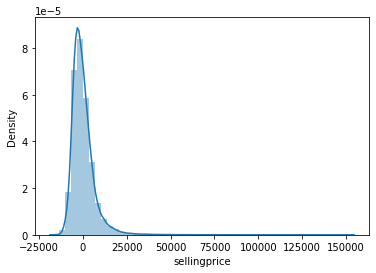

In [43]:
# Distribution plot y_test - prediction data
sns.distplot(y_test-predict)

The plot indicates the data is almost normally distributed with mean value of 0. The model seems to be performing well. Let's also calculate Mean absolute error (MAE), mean square error (MSE), root mean squared error (RMSE) and r2 score (R2_score).

In [44]:
from sklearn import metrics

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))
print('R2-Score:', metrics.r2_score(y_test, predict))

MAE: 4484.729844142998
MSE: 44578300.362609
RMSE: 6676.69831298442
R2-Score: 0.5186586738940303


### Decision Tree Regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

In [47]:
dt_reg = DecisionTreeRegressor()

In [48]:
param_grid = {'splitter':['best','random'],
            'max_depth' : [i for i in range(5, 55, 5)],
           'min_samples_leaf':[i for i in range(1, 11)],
           'min_weight_fraction_leaf':[i for i in np.linspace(0.1, 1, 10)],
           'max_features':['auto','log2','sqrt'],
           'max_leaf_nodes':[i for i in range(5, 55, 5)]}

In [49]:
dt_reg_search = RandomizedSearchCV(estimator=dt_reg, param_distributions=param_grid, cv=3, 
                                scoring='neg_mean_squared_error', verbose=2, random_state=75)

In [50]:
dt_reg_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.30000000000000004, splitter=best; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.30000000000000004, splitter=best; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.30000000000000004, splitter=best; total time=   0.1s
[CV] END max_depth=25, max_features=auto, max_leaf_nodes=25, min_samples_leaf=8, min_weight_fraction_leaf=0.30000000000000004, splitter=best; total time=   0.2s
[CV] END max_depth=25, max_features=auto, max_leaf_nodes=25, min_samples_leaf=8, min_weight_fraction_leaf=0.30000000000000004, splitter=best; total time=   0.2s
[CV] END max_depth=25, max_features=auto, max_leaf_nodes=25, min_samples_leaf=8, min_weight_fraction_leaf=0.30000000000000004, splitter=b

/Users/pkhatri/opt/anaconda3/envs/myenv3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/pkhatri/opt/anaconda3/envs/myenv3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/pkhatri/opt/anaconda3/envs/myenv3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/Users/pkhatri/opt/anaconda3/envs/myenv3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 304, in fi

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'max_features': ['auto', 'log2',
                                                         'sqrt'],
                                        'max_leaf_nodes': [5, 10, 15, 20, 25,
                                                           30, 35, 40, 45, 50],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_weight_fraction_leaf': [0.1, 0.2,
                                                                     0.30000000000000004,
                                                                     0.4, 0.5,
                                                                     0.6,
                   

In [51]:
# Finding best parameters
dt_reg_search.best_params_

{'splitter': 'best',
 'min_weight_fraction_leaf': 0.30000000000000004,
 'min_samples_leaf': 8,
 'max_leaf_nodes': 25,
 'max_features': 'auto',
 'max_depth': 25}

In [52]:
predict_dt = dt_reg_search.predict(X_test)

/Users/pkhatri/opt/anaconda3/envs/myenv3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sellingprice', ylabel='Density'>

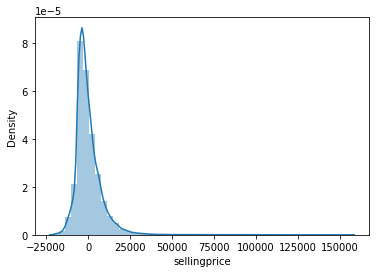

In [53]:
# Distribution plot y_test - prediction data
sns.distplot(y_test - predict_dt)

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test, predict_dt))
print('MSE:', metrics.mean_squared_error(y_test, predict_dt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_dt)))
print('R2-Score:', metrics.r2_score(y_test, predict_dt))

MAE: 5367.117208632735
MSE: 60564542.92805933
RMSE: 7782.322463638945
R2-Score: 0.34604466363984454


Clearly, Linear Regression is performing better than Decision Tree Regressor. 

### Random Forest Regressor

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
rf_reg = RandomForestRegressor()
param_grid = {'n_estimators': [i for i in range(5, 100, 5)], 
             'max_depth': [i for i in range(5, 41, 5)], 
             'min_samples_split': [int(i) for i in np.linspace(2, 10, 5)], 
             'min_samples_leaf': [int(i) for i in range(1, 10, 2)], 
             'max_features': ['auto', 'sqrt', 'log2'], 
             'bootstrap': [True, False]}

In [57]:
rf_rsearch = RandomizedSearchCV(estimator=rf_reg, param_distributions=param_grid, n_iter=5, cv=3, 
                                scoring='neg_mean_squared_error', verbose=2, random_state=75)

In [ ]:
rf_rsearch.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=65; total time= 1.1min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=65; total time= 1.1min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=65; total time= 1.1min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=80; total time=  13.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=80; total time=  13.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=80; total time=  13.7s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=30; total time=  

In [ ]:
# Finding best parameters
rf_rsearch.best_params_

In [ ]:
predict_rf = rf_rsearch.predict(X_test)

In [ ]:
# Distribution plot y_test - prediction data
sns.distplot(y_test-predict_rf)

The plot indicates the data is almost normally distributed with mean value of 0. The model seems to be performing well and slightly better than Linear Regression. But let's also calculate Mean absolute error (MAE), mean square error (MSE), root mean squared error (RMSE) and r2 score (R2_score) as well to select a better model.

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predict_rf))
print('MSE:', metrics.mean_squared_error(y_test, predict_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_rf)))
print('R2-Score:', metrics.r2_score(y_test, predict_rf))

In [ ]:
# Let's compare the metrics in table
metrics_dict = {'Linear Regression': [metrics.mean_absolute_error(y_test, predict), 
                                     metrics.mean_squared_error(y_test, predict), 
                                     np.sqrt(metrics.mean_squared_error(y_test, predict)), 
                                     metrics.r2_score(y_test, predict)], 
               'Random Forest Regression': [metrics.mean_absolute_error(y_test, predict_rf), 
                                     metrics.mean_squared_error(y_test, predict_rf), 
                                     np.sqrt(metrics.mean_squared_error(y_test, predict_rf)), 
                                     metrics.r2_score(y_test, predict_rf)]}

pd.DataFrame(metrics_dict, index=['MAE', 'MSE', 'RMSE', 'R2-Score']).round(2)

The Random Forest Regression model performs way better based on the results. We will use Random Forest Regression in making predictions going forward. 

# Save the model and label encoder

In [ ]:
from joblib import dump

# Save model
dump(rf_rsearch, 'carpricepredict.joblib', compress=3)

# Save label encoder
dump(encoder_dict, 'enconder_dict.joblib')

# Save make-model-trim info
dump(mmt, 'make_model_trim.joblib')